# Price Prediction Airbnb Seattle

I am trying to build a price suggestion model for appartments in Airbnb Seattle. The data used in this post has been downloaded from the http://insideairbnb.com/ website. 

This post contains two main parts:

    * the data preprocessing, which aims at cleaning the data and selecting the most useful features for the models.
    * the modelling with 3 different algorithms: Random Forests, XGBoost and a Neural Network.




In [6]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
import random
random.seed(42)

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))
pd.options.display.max_columns = 20

read data

In [8]:
df = pd.read_csv("seattle_listings.csv", header=0, index_col=0)
print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 7785 rows, 95 columns.


In [9]:
df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2318,https://www.airbnb.com/rooms/2318,20180517031042,2018-05-17,"Casa Madrona - Urban Oasis, 1 block from the P...","Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, 1917 Dutch Colo...",none,NaN,"We adhere to a 10pm -9am quiet hour schedule, ...",...,f,NaN,{WASHINGTON},t,f,strict_14_with_grace_period,f,f,2,0.14
4291,https://www.airbnb.com/rooms/4291,20180517031042,2018-05-17,Sunrise in Seattle Master Suite,This property is located in the lovely Maple L...,"Located in Seattle, this is a spacious, clean ...",This property is located in the lovely Maple L...,none,NaN,NaN,...,f,NaN,{WASHINGTON},f,f,moderate,f,f,5,0.91
5682,https://www.airbnb.com/rooms/5682,20180517031042,2018-05-17,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,My personal favorite places to dine are: • Ma...,...,f,NaN,{WASHINGTON},f,f,strict_14_with_grace_period,f,t,1,4.31
6606,https://www.airbnb.com/rooms/6606,20180517031042,2018-05-17,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,"A peaceful yet highly accessible neighborhood,...","Check in is at three, if you'd like a snack or...",...,f,NaN,{WASHINGTON},f,f,strict_14_with_grace_period,f,f,3,1.02
9419,https://www.airbnb.com/rooms/9419,20180517031042,2018-05-17,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...","This area is an arts district,you will see all...",...,f,NaN,{WASHINGTON},f,f,moderate,t,t,5,1.26


In [10]:
print(df.columns)

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedr

# Data Exploration

### Feature Selection

In [12]:
useless = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'city', 'state', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'weekly_price', 'monthly_price']
df.drop(useless, axis=1, inplace=True)

In [14]:
# Drop reviews features as they are not available for new apartments in Airbnb
useless = ['number_of_reviews', 'first_review', 'last_review', 'review_scores_rating',
           'review_scores_accuracy', 'review_scores_cleanliness',
           'review_scores_checkin', 'review_scores_communication',
           'review_scores_location', 'review_scores_value', 'reviews_per_month']
df.drop(useless, axis=1, inplace=True)

In [15]:
df.columns

Index(['host_total_listings_count', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'requires_license', 'license', 'jurisdiction_names', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [21]:
print("Dataset has {} rows, {} columns.".format(*df.shape))
df.head()

Dataset has 7785 rows, 36 columns.


,host_total_listings_count,street,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,...,availability_365,calendar_last_scraped,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
id,,,,,,,,,,,,,,,,,,,,,
2318,2.0,"Seattle, WA, United States",Madrona,Madrona,98122,47.610819,-122.290816,House,Entire home/apt,8,...,289,2018-05-17,f,{WASHINGTON},t,f,strict_14_with_grace_period,f,f,2
4291,5.0,"Seattle, WA, United States",Roosevelt,Roosevelt,98115,47.687801,-122.313427,House,Private room,2,...,312,2018-05-17,f,{WASHINGTON},f,f,moderate,f,f,5
5682,1.0,"Seattle, WA, United States",South Delridge,South Delridge,98106,47.523980,-122.359891,Guest suite,Entire home/apt,2,...,157,2018-05-17,f,{WASHINGTON},f,f,strict_14_with_grace_period,f,t,1
6606,4.0,"Seattle, WA, United States",Wallingford,Wallingford,98103,47.654109,-122.337605,Apartment,Entire home/apt,2,...,325,2018-05-17,f,{WASHINGTON},f,f,strict_14_with_grace_period,f,f,3
9419,5.0,"Seattle, WA, United States",Georgetown,Georgetown,98108,47.550620,-122.320135,Apartment,Private room,2,...,349,2018-05-17,f,{WASHINGTON},f,f,moderate,t,t,5


In [17]:
# Drop count = 0 and count < 600 (square_feet)
useless = ['neighbourhood_group_cleansed', 'license', 'has_availability', 'square_feet']
df.drop(useless, axis=1, inplace=True)

### Feature emptiness



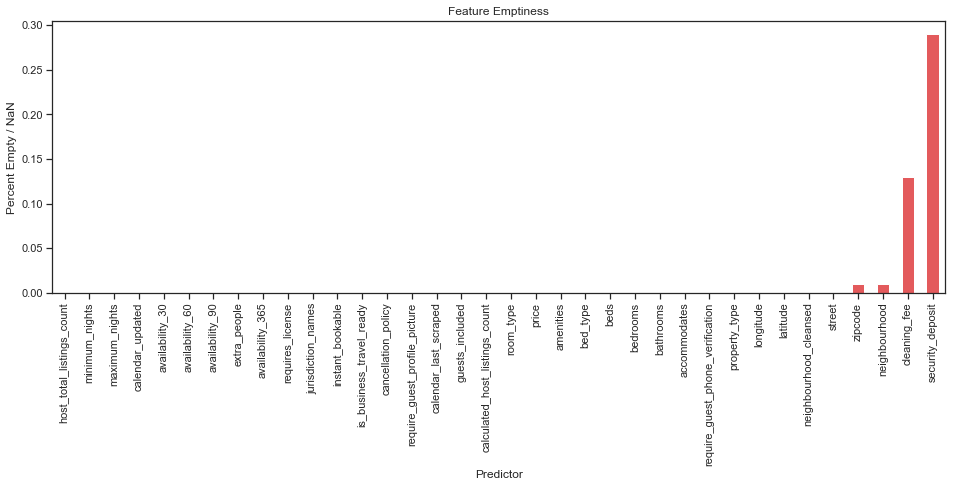

In [20]:
import matplotlib.pyplot as plt

def percent_empty(df):
    
    bools = df.isnull().tolist()
    percent_empty = float(bools.count(True)) / float(len(bools))
    
    return percent_empty, float(bools.count(True))

# Store emptiness for all features
emptiness = []

missing_columns = []

# Get emptiness for all features
for i in range(0, df.shape[1]):
    p, n = percent_empty(df.iloc[:,i])
    if n > 0:
        missing_columns.append(df.columns.values[i])
    emptiness.append(round((p), 2))
    
empty_dict = dict(zip(df.columns.values.tolist(), emptiness))

# Plot emptiness graph
empty = pd.DataFrame.from_dict(empty_dict, orient = 'index').sort_values(by=0)
ax = empty.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Predictor')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
ax.legend_.remove()

plt.show()

I am going to drop security_deposit 

In [23]:
# Drop security_deposit 
useless = ['security_deposit']
df.drop(useless, axis=1, inplace=True)

In [24]:
# Clean numeric fields
num_feats = ['cleaning_fee', 'extra_people', 'price']
df[num_feats] = df[num_feats].replace('[\$,]', '', regex=True)
df[num_feats] = df[num_feats].apply(pd.to_numeric, errors='coerce')
print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 7785 rows, 35 columns.


In [25]:
df.describe()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count
count,7779.000000,7785.000000,7785.000000,7785.000000,7778.000000,7784.000000,7785.000000,7785.000000,6782.000000,7785.000000,7785.000000,7785.000000,7785.000000,7785.000000,7785.000000,7785.000000,7785.000000,7785.000000
mean,37.642628,47.627019,-122.333612,3.569043,1.289792,1.369347,1.853950,150.853821,68.279416,1.944509,12.080796,2.766217,633.192935,6.222222,16.124213,27.355941,128.368144,13.283365
std,136.733400,0.045681,0.031784,2.177950,0.624992,0.994597,1.292566,255.345205,54.942741,1.611401,19.422608,9.753320,1255.754816,7.733049,17.265545,27.107776,121.331301,32.595939
min,0.000000,47.494801,-122.419637,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,47.606150,-122.354371,2.000000,1.000000,1.000000,1.000000,77.000000,30.000000,1.000000,0.000000,1.000000,29.000000,0.000000,0.000000,0.000000,9.000000,1.000000
50%,2.000000,47.622492,-122.330958,3.000000,1.000000,1.000000,1.000000,110.000000,50.000000,1.000000,5.000000,2.000000,1125.000000,3.000000,11.000000,20.000000,90.000000,1.000000
75%,5.000000,47.662671,-122.311995,4.000000,1.000000,2.000000,2.000000,175.000000,95.000000,2.000000,20.000000,2.000000,1125.000000,10.000000,27.000000,47.000000,253.000000,4.000000
max,1343.000000,47.733923,-122.242037,20.000000,8.000000,10.000000,15.000000,10000.000000,700.000000,16.000000,300.000000,400.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,172.000000


In [27]:
# Drop street as we have enought localisation info (redundant)
# Drop calendar_last_scraped and calendar_updated (date)

useless = ['street', 'calendar_last_scraped', 'calendar_updated']
df.drop(useless, axis=1, inplace=True)

In [28]:
# Focus on zipcode

from collections import Counter

# Get number of zipcodes
nb_counts = Counter(df.zipcode)
print("Number of Zipcodes:", len(nb_counts))

Number of Zipcodes: 32


Ploting number of listing in each zipcode

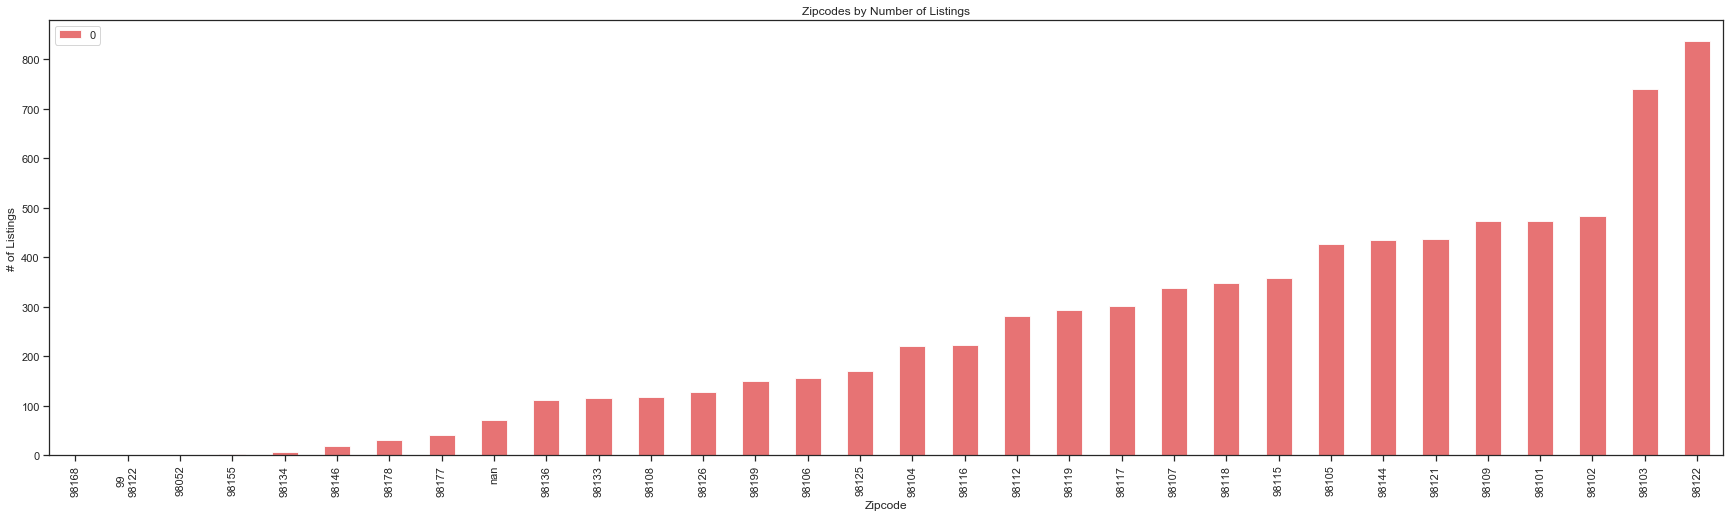

In [29]:
# Plot number of listings in each zipcode
import pandas as pd
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
ax = tdf.plot(kind='bar', figsize = (30,8), color = '#E35A5C', alpha = 0.85)
ax.set_title("Zipcodes by Number of Listings")
ax.set_xlabel("Zipcode")
ax.set_ylabel("# of Listings")
plt.show()

In [30]:
# Delete zipcodes with less than 100 entries
for i in list(nb_counts):
    if nb_counts[i] < 100:
        del nb_counts[i]
        df = df[df.zipcode != i]

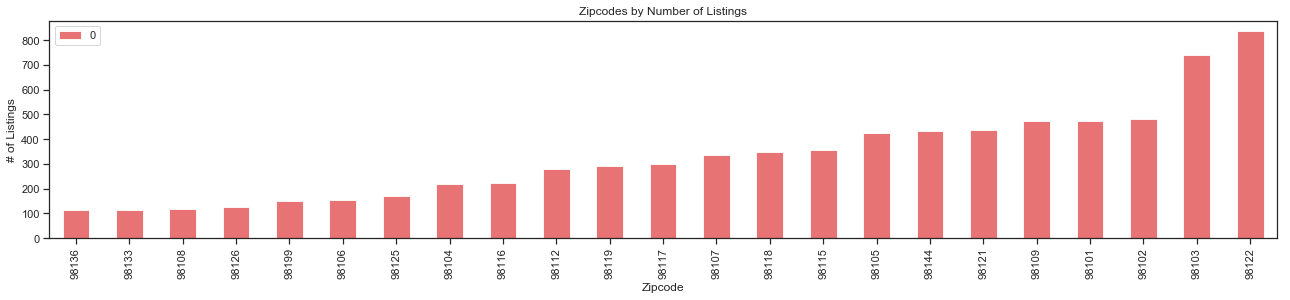

Number of entries removed:  100


In [31]:
# Plot new zipcodes distribution
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
ax = tdf.plot(kind='bar', figsize = (22,4), color = '#E35A5C', alpha = 0.85)
ax.set_title("Zipcodes by Number of Listings")
ax.set_xlabel("Zipcode")
ax.set_ylabel("# of Listings")

plt.show()

print ('Number of entries removed: ', 7785 - df.shape[0])

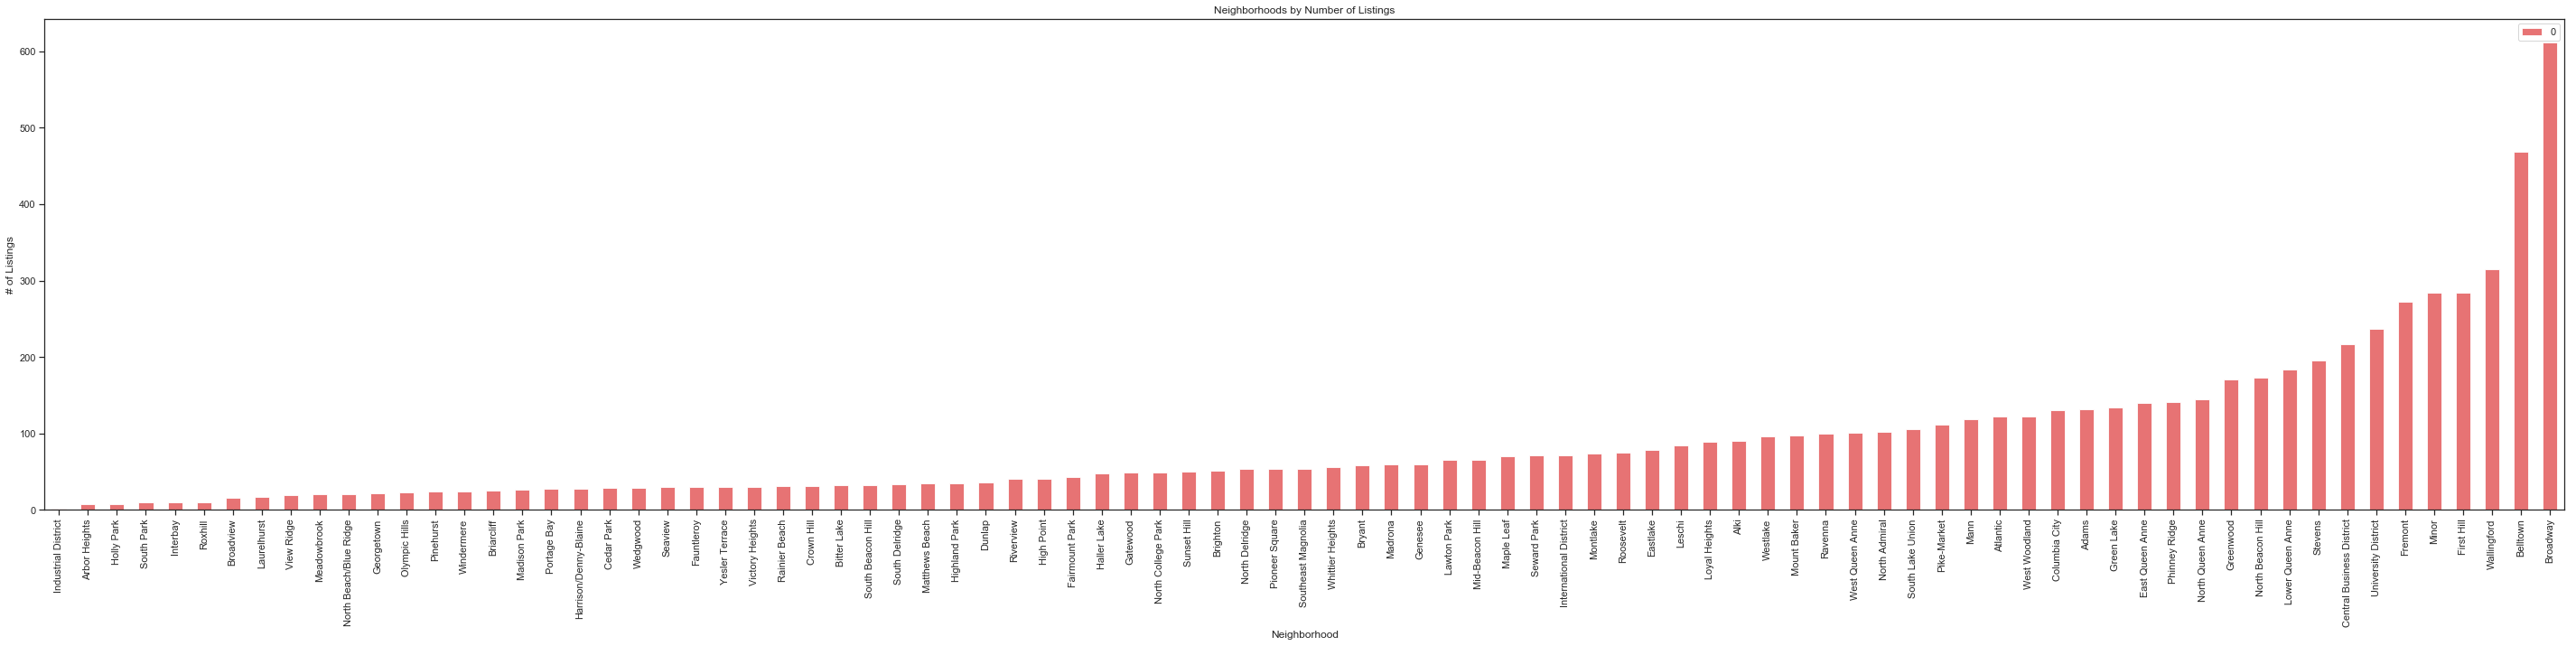

Number of Neighborhoods: 87


In [32]:
# Focus on neighbourhood_cleansed

# Get number of listings in neighborhoods
nb_counts = Counter(df.neighbourhood_cleansed)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)

# Plot number of listings in each neighborhood
ax = tdf.plot(kind='bar', figsize = (50,10), color = '#E35A5C', alpha = 0.85)
ax.set_title("Neighborhoods by Number of Listings")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")
plt.show()

print("Number of Neighborhoods:", len(nb_counts))

In [33]:
df.shape

(7685, 32)

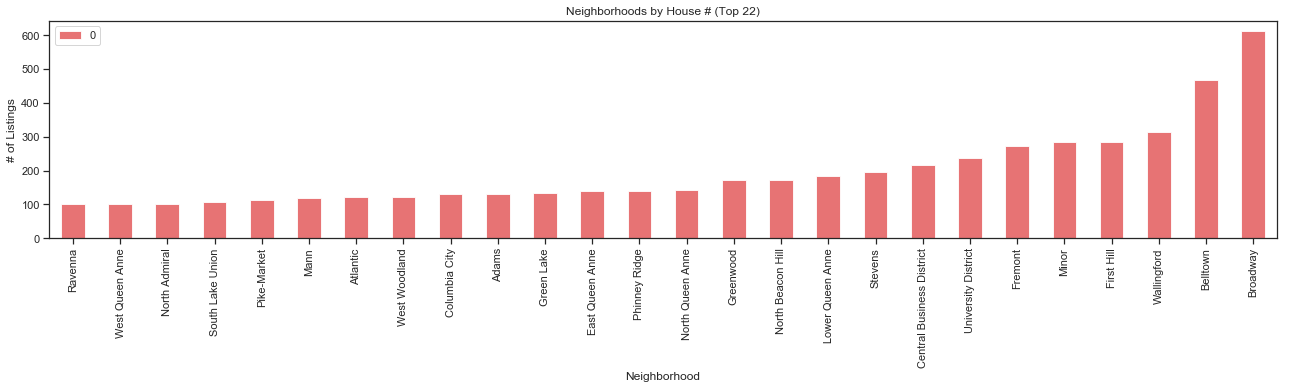

Number of entries removed:  2570


In [34]:
# Delete neighborhoods with less than 100 entries
for i in list(nb_counts):
    if nb_counts[i] < 100:
        del nb_counts[i]
        df = df[df.neighbourhood_cleansed != i]

# Plot new neighborhoods distribution
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
ax = tdf.plot(kind='bar', figsize = (22,4), color = '#E35A5C', alpha = 0.85)
ax.set_title("Neighborhoods by House # (Top 22)")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")

plt.show()

print('Number of entries removed: ', 7685 - df.shape[0])

Time to check multicollinearity

## Examine multicollinearity

This part of the code will give me a dataframe with correlation coefficients.

In [36]:
import numpy as np
from sklearn import preprocessing

# Function to label encode categorical variables.
# Input: array (array of values)
# Output: array (array of encoded values)
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Temporary dataframe
temp_data = df.copy()
# Delete additional entries with NaN values
temp_data = temp_data.dropna(axis=0)

# Encode categorical data
temp_data = temp_data.apply(encode_categorical)
# Compute matrix of correlation coefficients
corr_matrix = np.corrcoef(temp_data.T)

corr_df = pd.DataFrame(data = corr_matrix, columns = temp_data.columns, 
             index = temp_data.columns)

corr_df

/home/dheeraj/work/env1/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/dheeraj/work/env1/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,host_total_listings_count,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,availability_90,availability_365,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
host_total_listings_count,1.000000,-0.192588,-0.205773,-0.103570,-0.168430,-0.042985,-0.263384,-0.126037,0.061693,0.051412,...,0.210667,0.247255,NaN,NaN,0.196259,NaN,0.260913,0.366026,0.354185,0.643614
neighbourhood,-0.192588,1.000000,0.814316,-0.114720,0.282050,0.083765,0.192902,0.132194,0.016662,0.102888,...,-0.010455,-0.007892,NaN,NaN,-0.079146,NaN,-0.113228,-0.074904,-0.082931,-0.131826
neighbourhood_cleansed,-0.205773,0.814316,1.000000,-0.113300,0.348491,0.012622,0.230579,0.131862,0.019521,0.097587,...,-0.037633,-0.016216,NaN,NaN,-0.077830,NaN,-0.122887,-0.082559,-0.090160,-0.159201
zipcode,-0.103570,-0.114720,-0.113300,1.000000,-0.413923,0.168761,0.100752,-0.014501,-0.001632,-0.020933,...,-0.020779,-0.079530,NaN,NaN,0.054253,NaN,-0.023973,0.002256,-0.009457,-0.077204
latitude,-0.168430,0.282050,0.348491,-0.413923,1.000000,-0.366219,0.127555,0.080934,0.015032,0.021940,...,-0.013111,-0.008321,NaN,NaN,-0.079449,NaN,-0.074947,-0.108585,-0.105633,-0.149246
longitude,-0.042985,0.083765,0.012622,0.168761,-0.366219,1.000000,0.019926,0.090286,-0.086029,-0.019307,...,-0.007408,-0.031495,NaN,NaN,0.037421,NaN,-0.049169,-0.018416,-0.011463,0.023736
property_type,-0.263384,0.192902,0.230579,0.100752,0.127555,0.019926,1.000000,0.328695,0.129891,0.294258,...,-0.057690,-0.091675,NaN,NaN,-0.110168,NaN,-0.121293,-0.137250,-0.140059,-0.270282
room_type,-0.126037,0.132194,0.131862,-0.014501,0.080934,0.090286,0.328695,1.000000,-0.377407,0.037521,...,0.093944,-0.002317,NaN,NaN,-0.110880,NaN,-0.148265,-0.089708,-0.097759,-0.054086
accommodates,0.061693,0.016662,0.019521,-0.001632,0.015032,-0.086029,0.129891,-0.377407,1.000000,0.545940,...,-0.061377,0.034506,NaN,NaN,0.040238,NaN,0.183725,0.033328,0.042027,-0.042472
bathrooms,0.051412,0.102888,0.097587,-0.020933,0.021940,-0.019307,0.294258,0.037521,0.545940,1.000000,...,-0.002282,0.048081,NaN,NaN,-0.046025,NaN,0.108982,-0.007260,-0.006798,0.041899


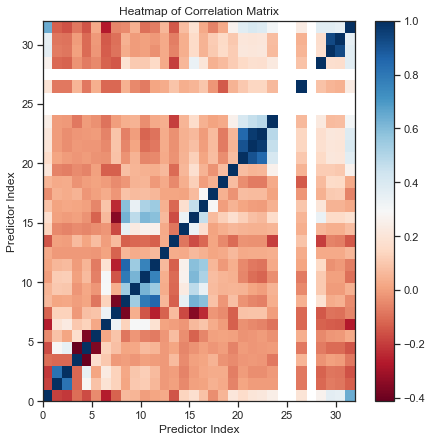

In [37]:
import matplotlib.pyplot as plt

# Display heat map 
plt.figure(figsize=(7, 7))
plt.pcolor(corr_matrix, cmap='RdBu')
plt.xlabel('Predictor Index')
plt.ylabel('Predictor Index')
plt.title('Heatmap of Correlation Matrix')
plt.colorbar()

plt.show()

This plot shows that calculated_host_listings_count is highly correlated with host_total_listings_count. So I decide to only keep the last one.

I also see that the availability_* variables are correlated with each other. I decide to keep availability_365 as this one is the less correlated with other variables.

Finally, I decide to drop requires_license and jurisdiction_names, both have weird correlation results. 

In [39]:
# Drop calculated_host_listings_count as correlated with host_total_listings_count
# Keep availability_365 as availability variables are correlated with each other and this one is less correlated with other variables
# Drop requires_license (weird correlation result and won't impact the results)

useless = ['calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90', 'jurisdiction_names','requires_license']
df.drop(useless, axis=1, inplace=True)

In [40]:
df.shape

(5115, 26)

You dropped 3 rows.
Dataset has 2379 rows, 26 columns.


/home/dheeraj/work/env1/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


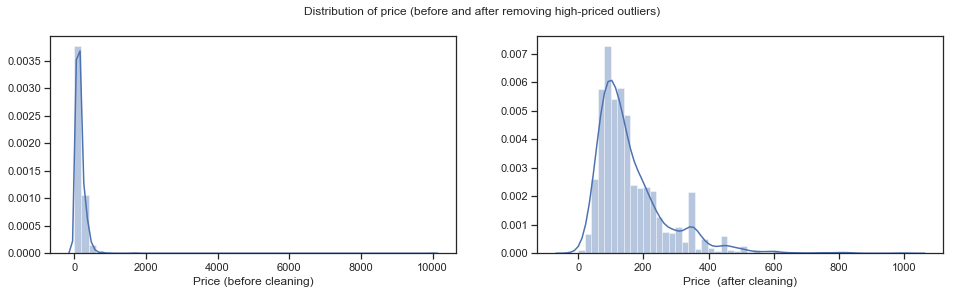

In [43]:
#Distribution of price
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of price (before and after removing high-priced outliers)')

# Before cleaning
x_axis=df['price'].dropna()
sns.distplot(pd.Series(x_axis, name='Price (before cleaning)'), ax=axs[0])

# Remove where price > 1000
condition = df[df['price'] > 1000]
rows_to_drop = condition.index
print("You dropped {} rows.".format(condition.shape[0]))
df = df.drop(rows_to_drop, axis=0)
print("Dataset has {} rows, {} columns.".format(*df.shape))

#After cleaning
x_axis=df['price'].dropna()
sns.distplot(pd.Series(x_axis, name='Price  (after cleaning)'), ax=axs[1])


### Remove high priced right-skewed data

Removing more than $600

You dropped 4 rows.
Dataset has 2073 rows, 17 columns.


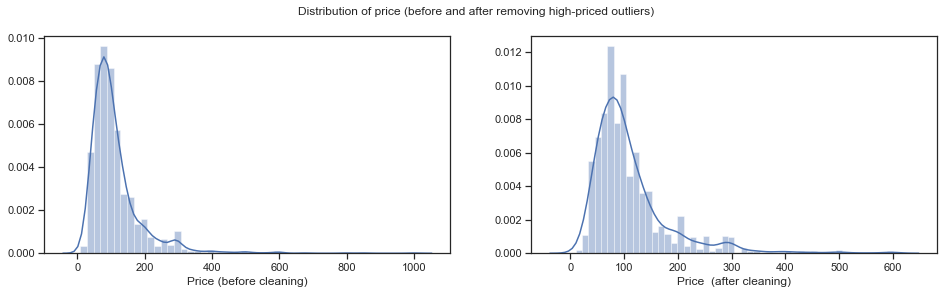

In [25]:
#Distribution of price
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of price (before and after removing high-priced outliers)')

# Before cleaning
x_axis=df['price'].dropna()
sns.distplot(pd.Series(x_axis, name='Price (before cleaning)'), ax=axs[0])

# Remove where price > 1000
condition = df[df['price'] > 600]
rows_to_drop = condition.index
print("You dropped {} rows.".format(condition.shape[0]))
df = df.drop(rows_to_drop, axis=0)
print("Dataset has {} rows, {} columns.".format(*df.shape))

#After cleaning
x_axis=df['price'].dropna()
sns.distplot(pd.Series(x_axis, name='Price  (after cleaning)'), ax=axs[1])

In [45]:
df.describe()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365
count,2378.000000,2379.000000,2379.000000,2379.000000,2375.000000,2379.000000,2379.000000,2379.00000,2222.00000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000
mean,72.798150,47.628813,-122.334610,3.779739,1.303579,1.339218,1.906683,161.09752,78.19847,2.107188,13.559899,2.891551,713.148382,174.916772
std,191.014709,0.030492,0.023563,2.228965,0.651329,1.010302,1.377960,107.74734,54.12409,1.667690,18.484078,9.315154,2119.148704,78.086104
min,1.000000,47.546800,-122.403907,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,1.000000,1.000000,60.000000
25%,1.000000,47.611168,-122.349515,2.000000,1.000000,1.000000,1.000000,90.00000,45.00000,1.000000,0.000000,1.000000,31.000000,102.000000
50%,3.000000,47.618880,-122.334797,3.000000,1.000000,1.000000,1.000000,128.00000,68.00000,2.000000,10.000000,2.000000,1125.000000,161.000000
75%,26.000000,47.655689,-122.316435,5.000000,1.500000,2.000000,2.000000,199.00000,100.00000,2.000000,25.000000,2.000000,1125.000000,257.000000
max,1343.000000,47.704708,-122.272684,20.000000,8.000000,10.000000,15.000000,995.00000,550.00000,14.000000,300.000000,400.000000,100000.000000,300.000000


In [46]:
df.shape

(2379, 26)

In [47]:
from sklearn.utils import shuffle
df = shuffle(df)

In [48]:
#Let's have a last look at the df dataframe:
df.iloc[0:6, 0:10]

,host_total_listings_count,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms
id,,,,,,,,,,
9411935,1.0,Capitol Hill,Broadway,98122,47.618953,-122.323907,Apartment,Shared room,2,1.0
21004143,525.0,South Lake Union,South Lake Union,98109,47.624296,-122.334870,Apartment,Entire home/apt,3,1.0
278830,3.0,Queen Anne,West Queen Anne,98119,47.632918,-122.372471,House,Entire home/apt,6,2.0
24454685,1.0,Minor,Minor,98122,47.611418,-122.311518,Townhouse,Entire home/apt,7,2.0
17655313,1.0,Atlantic,Atlantic,98144,47.596468,-122.300505,Guest suite,Entire home/apt,3,1.0
16220273,525.0,First Hill,First Hill,98101,47.610457,-122.330449,Apartment,Entire home/apt,3,1.0


In [49]:
df.iloc[0:6, 11:22]

,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,instant_bookable
id,,,,,,,,,,,
9411935,1,Futon,"{Wifi,Kitchen,Heating,Washer,Dryer,""Smoke dete...",39.0,NaN,1,15.0,2,1125,108,f
21004143,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,G...",189.0,109.0,2,30.0,2,1125,135,t
278830,3,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",395.0,125.0,6,15.0,2,1125,214,t
24454685,3,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",298.0,150.0,1,0.0,3,1125,298,f
17655313,1,Real Bed,"{TV,Wifi,""Free street parking"",Heating,""Smoke ...",115.0,30.0,2,20.0,1,21,62,f
16220273,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,G...",189.0,109.0,2,30.0,2,1125,263,t


In [51]:
# Delete amenities feature (too complicated to process for the moment)
df.drop(['amenities'], axis=1, inplace=True)

### merging rare property types into others
For certain categories we dont have enough data, so we will merge them into one

In [44]:
df['property_type'].value_counts()

Apartment             1112
House                  660
Townhouse              149
Condominium            140
Guest suite            132
Guesthouse              52
Serviced apartment      35
Loft                    29
Bungalow                19
Bed and breakfast       16
Cabin                    7
Other                    7
Hostel                   5
Cottage                  5
Tiny house               3
Camper/RV                2
Houseboat                2
Boat                     2
Castle                   1
Boutique hotel           1
Name: property_type, dtype: int64

Will use only House, Apartment, Guest Suites, Guesthouse

In [54]:
categories_to_rename = ['Bungalow','Guesthouse','Boutique hotel','Loft','Bed and breakfast', 'Tiny house', 
                        'Camper/RV','Cottage','Castle', 'Hostel', 'Boat','Cabin','Tent','Serviced apartment','Villa','Bus','Hut', 'Farm stay', 'Yurt','Houseboat', 'Earth house']
df['property_type'].loc[df['property_type'].isin(categories_to_rename)] = 'Other'


/home/dheeraj/work/env1/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
df['property_type'].value_counts()

Apartment      1112
House           660
Other           186
Townhouse       149
Condominium     140
Guest suite     132
Name: property_type, dtype: int64

In [60]:
df.head()

,host_total_listings_count,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,,,,,,,,,,,,,,,
9411935,1.0,Capitol Hill,Broadway,98122,47.618953,-122.323907,Apartment,Shared room,2,1.0,...,1,15.0,2,1125,108,f,f,moderate,f,f
21004143,525.0,South Lake Union,South Lake Union,98109,47.624296,-122.334870,Apartment,Entire home/apt,3,1.0,...,2,30.0,2,1125,135,t,f,strict_14_with_grace_period,t,t
278830,3.0,Queen Anne,West Queen Anne,98119,47.632918,-122.372471,House,Entire home/apt,6,2.0,...,6,15.0,2,1125,214,t,f,strict_14_with_grace_period,f,f
24454685,1.0,Minor,Minor,98122,47.611418,-122.311518,Townhouse,Entire home/apt,7,2.0,...,1,0.0,3,1125,298,f,f,strict_14_with_grace_period,f,f
17655313,1.0,Atlantic,Atlantic,98144,47.596468,-122.300505,Guest suite,Entire home/apt,3,1.0,...,2,20.0,1,21,62,f,f,strict_14_with_grace_period,f,f


In [61]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [62]:
from sklearn.preprocessing import Imputer
# Impute most frequent for categorical features
categorical_feats = df.select_dtypes(include=['object']).columns
df[categorical_feats] = DataFrameImputer().fit_transform(df[categorical_feats])

# Impute median for numerical features
num_feats = df.select_dtypes(include=[np.number]).columns
imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
df[num_feats] = imp.fit_transform(df[num_feats])

print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 2379 rows, 25 columns.


In [63]:
df.isnull().values.any()

False

In [64]:
# One Hot Encoding for categorical variables
df = pd.get_dummies(df)

In [65]:
df.shape

(2379, 108)

# Methodology


### Data Preprocessing


In [66]:
df.describe()


,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,...,is_business_travel_ready_f,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
count,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.00000,2379.000000,2379.000000,...,2379.0,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000
mean,72.768810,47.628813,-122.334610,3.779739,1.303069,1.339218,1.906683,161.09752,77.525431,2.107188,...,1.0,0.134090,0.336696,0.508197,0.019336,0.001681,0.902480,0.097520,0.899958,0.100042
std,190.979903,0.030492,0.023563,2.228965,0.650899,1.010302,1.377960,107.74734,52.368170,1.667690,...,0.0,0.340821,0.472679,0.500038,0.137731,0.040979,0.296727,0.296727,0.300119,0.300119
min,1.000000,47.546800,-122.403907,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,47.611168,-122.349515,2.000000,1.000000,1.000000,1.000000,90.00000,45.000000,1.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,3.000000,47.618880,-122.334797,3.000000,1.000000,1.000000,1.000000,128.00000,68.000000,2.000000,...,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,26.000000,47.655689,-122.316435,5.000000,1.500000,2.000000,2.000000,199.00000,100.000000,2.000000,...,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1343.000000,47.704708,-122.272684,20.000000,8.000000,10.000000,15.000000,995.00000,550.000000,14.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Implementation

As a first step, the target variable 'price' has to be seperated from the response variables to from the X and y data sets.

In [68]:
# Create response and target variable
target = 'price'
X = df.drop(target, axis=1)
y = df[target]

Step 2 - Both X and y data sets and respectively split into a training set and a testing set. I chose to use 30% of the data set for the testing set. As part of the splitting process, the data set is also shuffled to ensure there is no inherent or hidden order to the data set and that both the testing and training sets are a fair representative of the complete data set.

In [69]:
# Train test split
from sklearn.model_selection import train_test_split
test_size = 0.3
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Algorithms

* a Linear Regression
* a Decision Tree
* a Random Forest, with the RandomForestRegressor from the Scikit-learn library
* a Gradient Boosting method, with the XGBRegressor from the XGBoost library
* a Neural Network, with the MLPRegressor from the Scikit-learn library.

During this process, the models are tuned using scikit-learn's GridSearchCV function. This allows us to set out a grid of parameters to iteratively train and set the models on and ultimately choose the best parameters.

As tree-based algorithms are being applied, the parameters being tuned are the max no. of features used, the max depth of trees, the minimum sample split and the no. of trees grown (for random forest).

### Linear Regression

In [70]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
# Make predictions using the testing set
regr_y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, regr_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, regr_y_pred))

Mean squared error: 4764.82
Variance score: 0.59


### Decision tree model

In [72]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
dt_regr = DecisionTreeRegressor(random_state=seed, max_depth=5)
dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [73]:
# Make prediction
dt_y_pred = dt_regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, dt_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, dt_y_pred))

Mean squared error: 5584.18
Variance score: 0.52


### Random forest model

In [74]:
from sklearn.ensemble import RandomForestRegressor

/home/dheeraj/work/env1/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [75]:
%%time
rf_regr = RandomForestRegressor(random_state=seed, bootstrap=True, criterion='mse', max_depth=10, 
                           max_features='auto', min_samples_split=4, n_estimators=150)
rf_regr.fit(X_train, y_train)

CPU times: user 1.06 s, sys: 0 ns, total: 1.06 s
Wall time: 1.06 s


In [76]:
# Make prediction
rf_y_pred = rf_regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, rf_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, rf_y_pred))

Mean squared error: 3535.23
Variance score: 0.69


### Refinement

Refinement process includes adjusting of parameters for certain models to acquire improved solutions.


### Tuning the final model
The parameters for the final Random Forest model is tuned using scikit-learn's GridSearchCV.

In [90]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 4)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# # max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
# # max_depth.append(None)
# max_depth = [10, 14, 15, 16, 18]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid


#Tuning the model
param_grid = { "n_estimators"      : [175, 200, 225, 250],
           "criterion"         : ['mse'],
           "max_features"      : ['auto'], #auto, sqrt, log2, int/n_feature
           "max_depth"         : [10, 14, 15, 16, 18],
           "min_samples_split" : [6, 7, 8, 9, 10] ,
           "bootstrap": [True]}

from pprint import pprint
pprint(param_grid)


{'bootstrap': [True],
 'criterion': ['mse'],
 'max_depth': [10, 14, 15, 16, 18],
 'max_features': ['auto'],
 'min_samples_split': [6, 7, 8, 9, 10],
 'n_estimators': [175, 200, 225, 250]}


In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
%%time
rf = RandomForestRegressor(random_state=seed)

rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)

CPU times: user 13min 7s, sys: 304 ms, total: 13min 7s
Wall time: 13min 7s


In [91]:
# Make prediction
rf_y_pred = rf_cv.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, rf_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, rf_y_pred))
# Best params
print("Tuned Model Parameters: {}".format(rf_cv.best_params_))

Mean squared error: 3450.41
Variance score: 0.70
Tuned Model Parameters: {'bootstrap': True, 'criterion': 'mse', 'max_depth': 16, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 250}


In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
# Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data
from sklearn.preprocessing import StandardScaler

gbc_regr = GradientBoostingClassifier(random_state=seed, criterion='mse', max_depth=10, 
                           max_features='auto', min_samples_split=4, n_estimators=150)
gbc_regr.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.1,
              loss='deviance', max_depth=10, max_features='auto',
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=4, min_weight_fraction_leaf=0.0,
              n_estimators=150, presort='auto', random_state=42,
              subsample=1.0, verbose=0, warm_start=False)

In [96]:
# Make prediction
gbc_regr_y_pred = gbc_regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, gbc_regr_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, gbc_regr_y_pred))

Mean squared error: 8578.44
Variance score: 0.26
